Deeper Analysis on Bulglary Resedential

In [36]:
import numpy as np 
import pandas as pd 
import datetime

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set(style="white", color_codes=True)


dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')


FILE="philadelphiacrimedata/crime.csv"

d = pd.read_csv(FILE,
  header=0,names=['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code',  'Police_Districts', 'Month', 'Lon',
       'Lat'],dtype={'Dc_Dist':str,'Psa':str,
                'Dispatch_Date_Time':str,'Dispatch_Date':str,'Dispatch_Time':str,
                  'Hour':str,'Dc_Key':str,'Location_Block':str,
                     'UCR_General':str,'Text_General_Code':str,
              'Police_Districts':str,'Month':str,'Lon':str,'Lat':str},
             parse_dates=['Dispatch_Date_Time'],date_parser=dateparse)

# month to date time month matchings
d['Month'] = d['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m'))

In [37]:
d.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800,Other Assaults,NaN,2009-10-01,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600,All Other Offenses,NaN,2009-05-01,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800,Other Assaults,NaN,2009-08-01,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500,Weapon Violations,20,2009-07-01,-75.130477,40.036389
4,09,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600,All Other Offenses,8,2009-06-01,-75.16635,39.969532


In [38]:
# initialising the count of record 1 
d['Value'] = 1


# summing al the Dc_Dist
g=d.groupby(['Month','Text_General_Code'])['Value'].sum().reset_index()

# Text_general_code we have to give Burglary Resedential'
gg=g[(g['Text_General_Code'] == 'Burglary Residential')]
gg.head()

,Month,Text_General_Code,Value
5,2006-01-01,Burglary Residential,662
37,2006-02-01,Burglary Residential,485
68,2006-03-01,Burglary Residential,629
100,2006-04-01,Burglary Residential,582
132,2006-05-01,Burglary Residential,704


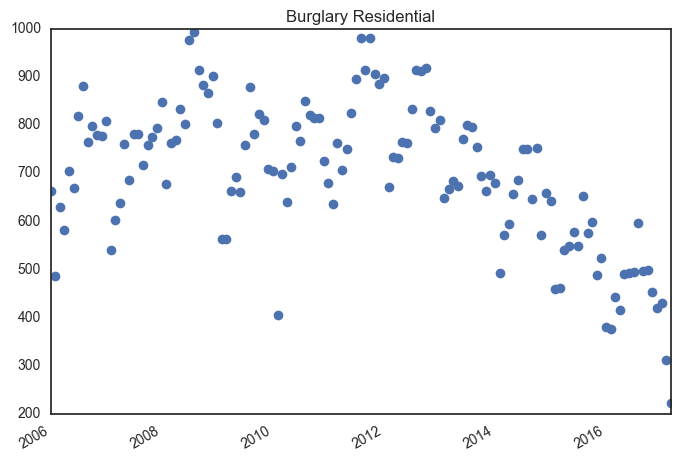

In [39]:
# creating a plot for different years
fig, ax = plt.subplots()
ax.plot_date(gg['Month'], gg['Value'])
ax.set_title("Burglary Residential")
fig.autofmt_xdate()
plt.show()

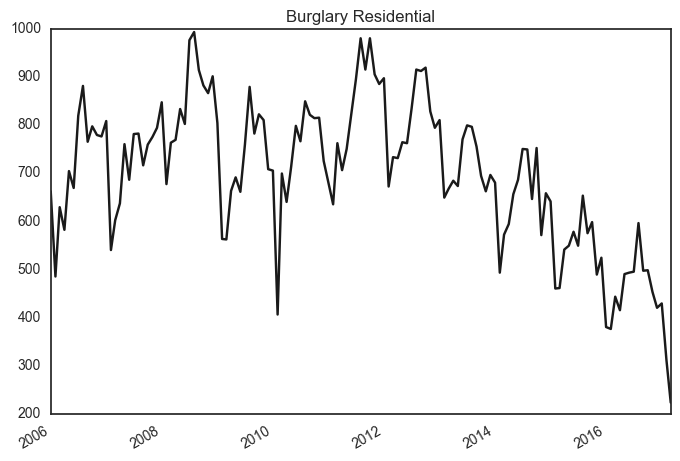

In [40]:

fig, ax = plt.subplots()
ax.plot_date(gg['Month'], gg['Value'],'k')
ax.set_title("Burglary Residential")
fig.autofmt_xdate()
plt.show()

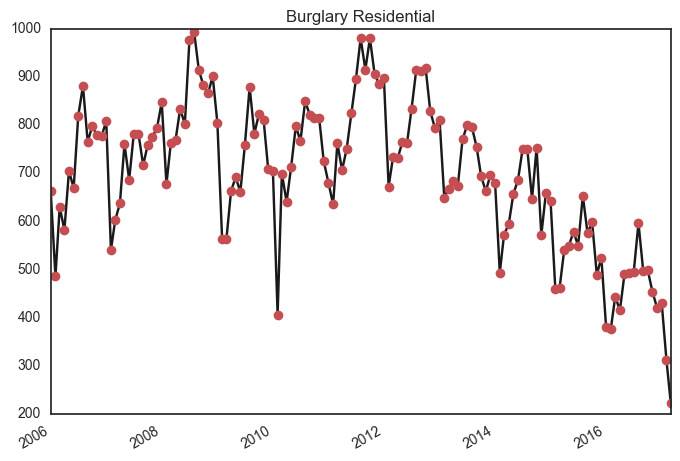

In [41]:
#lets find the peak points for this type of crime trends
fig, ax = plt.subplots()
ax.plot_date(gg['Month'], gg['Value'],'k')
ax.plot_date(gg['Month'], gg['Value'],'ro')
ax.set_title("Burglary Residential")
fig.autofmt_xdate()
plt.show()

In [42]:

# lets re-do grouping as we are not sure whether one DC_DIST will affect the result or set of dc_Dist's!!


# Count of 1 for each record
# initialising the count of record 1---> choosing any of data standard columns 
d['Value'] = 1


# Group by to sum up all Dc_dist
g=d.groupby(['Month','Text_General_Code','Dc_Dist'])['Value'].sum().reset_index()
gg=g[(g['Text_General_Code'] == 'Burglary Residential')]
gg.head(16)

,Month,Text_General_Code,Dc_Dist,Value
111,2006-01-01,Burglary Residential,01,9
112,2006-01-01,Burglary Residential,02,30
113,2006-01-01,Burglary Residential,03,15
114,2006-01-01,Burglary Residential,04,9
115,2006-01-01,Burglary Residential,05,21
116,2006-01-01,Burglary Residential,06,20
117,2006-01-01,Burglary Residential,07,16
118,2006-01-01,Burglary Residential,08,22
119,2006-01-01,Burglary Residential,09,13
120,2006-01-01,Burglary Residential,12,46


In [51]:
# Just picking two that might be interesting
sample1=gg[gg['Dc_Dist']=='12']
sample2=gg[gg['Dc_Dist']=='14']
sample3=gg[gg['Dc_Dist']=='17']


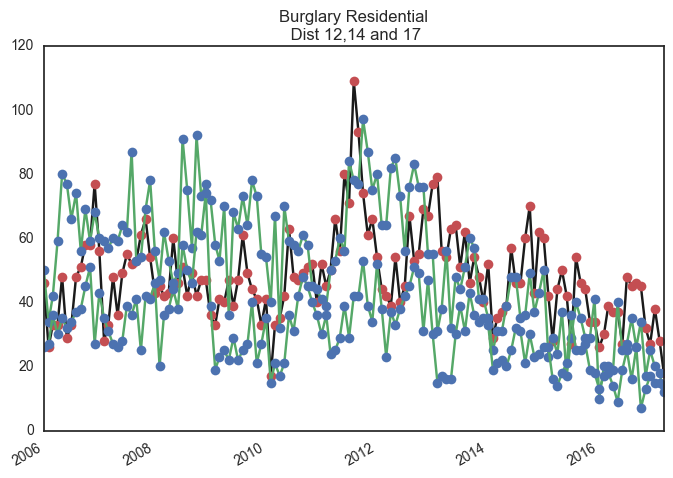

In [54]:
#
fig, ax = plt.subplots()
#sample1

ax.plot_date(sample1['Month'], sample1['Value'],'k')
ax.plot_date(sample1['Month'], sample1['Value'],'ro')
#sample2

ax.plot_date(sample2['Month'], sample2['Value'],'g')
ax.plot_date(sample2['Month'], sample2['Value'],'bo')
#sample3
ax.plot_date(sample3['Month'], sample3['Value'],'g')
ax.plot_date(sample3['Month'], sample3['Value'],'bo')


ax.set_title("Burglary Residential\n Dist 12,14 and 17")
fig.autofmt_xdate()
plt.show()


Here we are able to do analysis one Text_General_code.In this case it is Burglary Resedential.
You can compare how these crime trends change for different Dc_Dist codes in different years.
It is evident that crimes related to Burglary Resedential are almost constant  for different Dc_dist codes and years.
There must a proper channel to monitor this crimes. It looks like Crimes related to this are constantly taking place !!